In [0]:
# !pip install tensorflow

In [0]:
from keras.layers import Conv3D, Conv2D, Dropout, MaxPool2D, MaxPool3D
from keras.layers import Flatten, Dense, ReLU

from keras.models import Sequential
from keras import backend as K

from keras.optimizers import SGD

# from keras.datasets import mnist


import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
from keras.models import load_model
classifier = load_model('classification_model/banana4.h5')

In [0]:
img = cv2.imread('testing_img/test1.jpg')

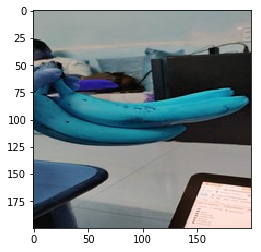

In [0]:
plt.imshow(img)

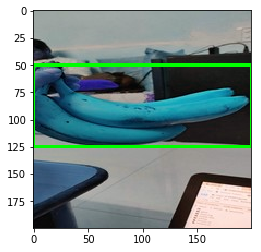

In [0]:
minx = 0
miny = 50
maxx = 200
maxy = 125
imgs = cv2.rectangle(img.copy(),(minx,miny),(maxx,maxy),(0,255,0),2)
plt.imshow(imgs)

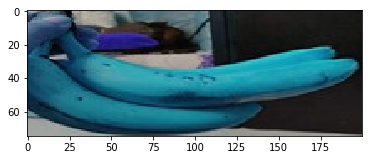

In [0]:
img = img[miny:maxy, minx:maxx]
plt.imshow(img)

In [0]:
imgs = cv2.resize(img,(200,200))

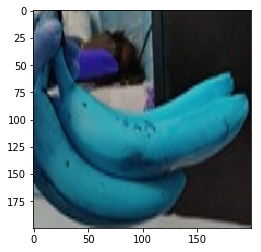

In [0]:
plt.imshow(imgs)

In [0]:
img_pred = imgs.copy()
img_pred = img_pred.reshape(1,200,200,3)
ans = classifier.predict(img_pred)
val = np.argmax(ans)
val

1

In [0]:
def get_labels(val):
    if val == 1:
        label = 'Artificial'
    else:
        label = 'Natural'
    return label

In [0]:
#[[xmix,ymin,xmax,ymax],[..]]
def Classification(img,coords):
    label = []
    for cord in coords:
        imgcp = img.copy()
        imgcp = imgcp[cord[1]:cord[3], cord[0]:cord[2]]
        imgs = cv2.resize(imgcp,(200,200))
        img_pred = imgs.reshape(1,200,200,3)
        ans = classifier.predict(img_pred)
        val = np.argmax(ans)
        label.append(get_labels(val))
    return label

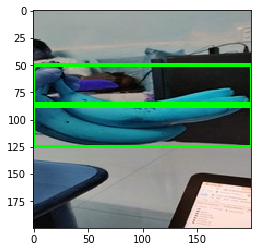

In [0]:
img = cv2.imread('testing_img/test1.jpg')
minx = 0
miny = 50
maxx = 200
maxy = 85
imgs = cv2.rectangle(img.copy(),(minx,miny),(maxx,maxy),(0,255,0),2)
imgs = cv2.rectangle(imgs,(0,88),(maxx,125),(0,255,0),2)
plt.imshow(imgs)

In [0]:
[]
coords = [[0,50,200,85],[0,88,200,125]]
labels = Classification(img,coords)
labels

['Artificial', 'Natural']